## heading

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np
%matplotlib inline  


notes to research 
* duration hist 
* compare between station data and bicycle data
* future survays
* distance vs duration
* pd.cut
* heat map
* interqurtile ranges
* 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
PublicTransport=pd.read_excel(r'D:\drop\Dropbox\palaace\TrafficData-20210409T115333Z-001\TrafficData\Public_transportation_infrastructure.xlsx',names=["Name","id","latitude","longitude","quay_id","quay_name","stopType"])


In [3]:
# do some data cleaning : drop nan , remove some insignificant features like id,latitude,longitude,quay_id,
PublicTransport.drop(["Name"],axis=1,inplace=True)
PublicTransport[PublicTransport.duplicated(keep=False)]

,id,latitude,longitude,quay_id,quay_name,stopType
2467,UXVheUF0RGlzdGFuY2U6MTIyNDI7TlNSOlF1YXk6NjgyOQ,59.917591,10.590949,NSR:Quay:6829,Bekkestua,regular
2468,UXVheUF0RGlzdGFuY2U6MTIyNDI7TlNSOlF1YXk6NjgyOQ,59.917591,10.590949,NSR:Quay:6829,Bekkestua,regular
4076,UXVheUF0RGlzdGFuY2U6MjM3NzM7TlNSOlF1YXk6OTI3MQ,59.758226,10.841919,NSR:Quay:9271,Langhushallen,regular
4077,UXVheUF0RGlzdGFuY2U6MjM3NzM7TlNSOlF1YXk6OTI3MQ,59.758226,10.841919,NSR:Quay:9271,Langhushallen,regular


In [4]:
#the duplicated data is only 2 records so we can drop them
PublicTransport.drop_duplicates(inplace=True)

In [5]:
PublicTransport["stopType"].value_counts()

regular    4220
Name: stopType, dtype: int64

In [6]:
#we can drop stop Type and quay radiusID and ID , longitude , latitude
PublicTransport.drop(["id","latitude","longitude","quay_id","stopType"],axis=1,inplace=True)

In [7]:
PublicTransport.head()

,quay_name
0,Brugata
1,Brugata
2,Brugata
3,Brugata
4,Hammersborggata


In [8]:
PublicTransport["quay_name"]=PublicTransport["quay_name"].astype('category')

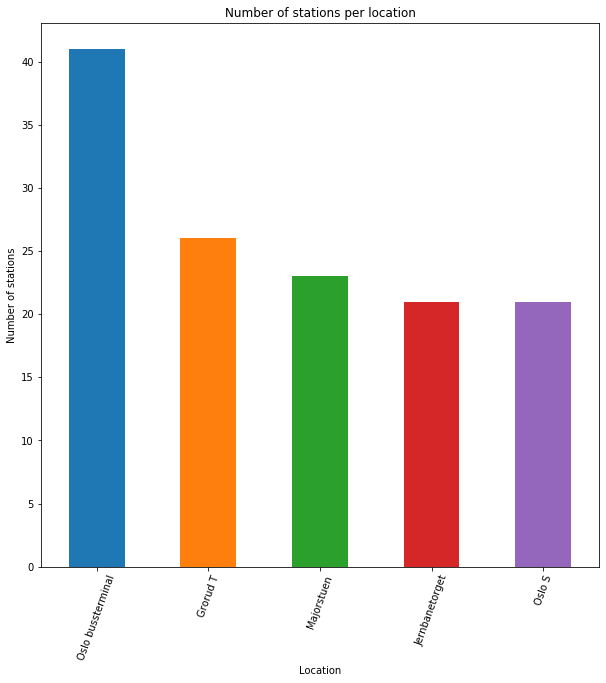

In [9]:
PublicTransport.groupby("quay_name").size().nlargest(5).plot(kind = "bar",figsize=(10,10))
plt.ylabel('Number of stations')
plt.xlabel('Location')
plt.xticks(rotation="70")

plt.title('Number of stations per location')
plt.show()

In [10]:

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [11]:
bicycle_df= pd.concat(pd.read_excel(r'D:\drop\Dropbox\palaace\TrafficData-20210409T115333Z-001\TrafficData\Bysykkeloversikt_2019 - Copy.xlsx', sheet_name=None,parse_dates=True),ignore_index=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


In [12]:
bicycle_df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,401,Schous plass,nærmest Thorvald Meyers gate,59.920259,10.760629,381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240
1,2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,556,Pilestredet,ved Sporveisgata,59.926224,10.729625,556,Pilestredet,ved Sporveisgata,59.926224,10.729625
2,2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,561,Kirkeveien,nord for Gørbitz' gate,59.933558,10.726426,471,Marienlyst,i Suhms gate,59.932454,10.721769
3,2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319
4,2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,597,Fredensborg,ved rundkjøringen,59.920995,10.750358,557,Akersgata,ved Grensen,59.914197,10.742883


In [13]:
bicycle_df['distance']=haversine_vectorize(bicycle_df['start_station_longitude'],bicycle_df['start_station_latitude'],bicycle_df['end_station_longitude'],bicycle_df['end_station_latitude'])

In [14]:
bicycle_df.drop(["start_station_id","start_station_description","start_station_latitude","start_station_longitude","end_station_id","end_station_description","end_station_latitude","end_station_longitude"],axis=1,inplace=True)

In [15]:

bicycle_df.reset_index(inplace=True)
bicycle_df.head()

,index,started_at,ended_at,duration,start_station_name,end_station_name,distance
0,0,2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,Schous plass,Grønlands torg,0.864666
1,1,2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,Pilestredet,Pilestredet,0.000000
2,2,2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,Kirkeveien,Marienlyst,0.286853
3,3,2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,Hans Nielsen Hauges plass,Hans Nielsen Hauges plass,0.000000
4,4,2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,Fredensborg,Akersgata,0.862568


In [16]:
bicycle_df.drop(["index"],axis=1,inplace=True)


In [17]:
bicycle_df['duration_hour']=bicycle_df['duration']/3600

In [18]:
bicycle_df.describe()

,duration,distance,duration_hour
count,2.060876e+06,2.060876e+06,2.060876e+06
mean,7.990310e+02,1.358923e+00,2.219531e-01
std,5.004109e+03,8.754587e-01,1.390030e+00
min,6.100000e+01,0.000000e+00,1.694444e-02
25%,3.260000e+02,7.423251e-01,9.055556e-02
50%,5.140000e+02,1.188680e+00,1.427778e-01
75%,8.170000e+02,1.798915e+00,2.269444e-01
max,1.194151e+06,7.931245e+00,3.317086e+02


In [ ]:
len(bicycle_df[bicycle_df['duration_hour']<=2.269444e-01]),len(bicycle_df)

In [ ]:
bicycle_df[bicycle_df['duration_hour']<=30]["duration_hour"].hist(bins=50)

In [ ]:
bicycle_melt=bicycle_df.melt(id_vars=["started_at","ended_at","duration","distance"],var_name="Start_end",value_name="Value")
bicycle_melt.head()


,started_at,ended_at,duration,distance,Start_end,Value
0,2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,0.864666,start_station_name,Schous plass
1,2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,0.000000,start_station_name,Pilestredet
2,2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,0.286853,start_station_name,Kirkeveien
3,2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,0.000000,start_station_name,Hans Nielsen Hauges plass
4,2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,0.862568,start_station_name,Fredensborg


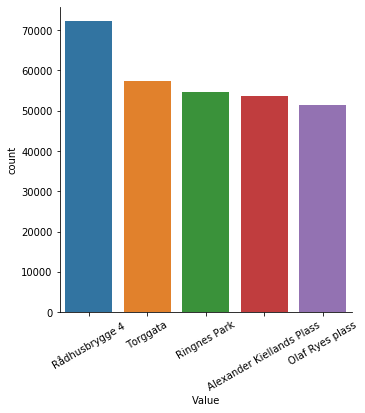

In [ ]:
g=sns.catplot(kind="count",data=bicycle_melt,x="Value",order=bicycle_melt.Value.value_counts().iloc[:5].index)
g.set_xticklabels(rotation=30)
plt.show()

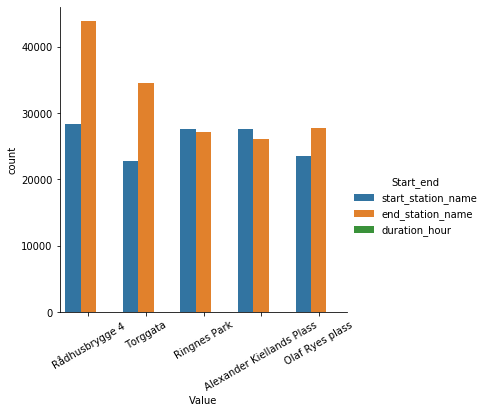

In [ ]:

g=sns.catplot(kind="count",data=bicycle_melt,x="Value",hue="Start_end",order=bicycle_melt.Value.value_counts().iloc[:5].index)
g.set_xticklabels(rotation=30)
plt.show()

In [ ]:
bicycle_melt.started_at=pd.to_datetime(bicycle_melt.started_at)
bicycle_melt.started_at=pd.to_datetime(bicycle_melt.started_at)

In [ ]:
bicycle_melt["month"]=bicycle_melt.started_at.dt.month.astype(int)

In [ ]:
g=sns.catplot(kind="point",data=bicycle_melt,x="Value",order=bicycle_melt.Value.value_counts().iloc[:5].index,\
              hue="month",height=8,aspect=True)
g.set_xticklabels(rotation=70)
plt.show()